In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import math


In [289]:
FILE_NUMBER = 19
FOLDER_NUMBER = 7554

In [290]:
def load_image_data():
    file_name = './data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    return (pd.read_csv(file_name + '.csv'), file_name + '.png') 

In [291]:
(df, img) = load_image_data()
df.head(10)

,X,Y,Pressure,TiltX,TiltY,Time
0,395.702044115949,414.660353,0.117174,-1110.0,385.0,00:06.9130198
1,399.862339762097,417.293452,0.123278,-1110.0,385.0,00:06.9442622
2,404.759902991108,419.241945,0.127184,-1117.0,362.0,00:06.9598894
3,411.23732532625,420.505832,0.035874,-1147.0,246.0,00:06.9755032
4,411.605959117681,420.663818,0.053452,-1147.0,246.0,00:06.9911299
5,412.18524078993,421.085114,0.118639,-1153.0,214.0,00:07.0068937
6,412.659198521769,421.664395,0.179187,-1163.0,144.0,00:07.0224902
7,412.659198521769,421.664395,0.215320,-1165.0,123.0,00:07.0379961
8,412.659198521769,421.664395,0.249744,-1165.0,123.0,00:07.0537600
9,411.184663356046,421.611733,0.276356,-1165.0,123.0,00:07.0693355


In [292]:
def col_X_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if pd.isna(data_as_str):
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
    
    if re.search("^[a-zA-Z]", data_as_str) is not None:
        return defualt_value
    return float(data_as_str)


In [293]:
def col_Y_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
        
    if pd.isna(data_as_str):
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
        
    return float(data_as_str)



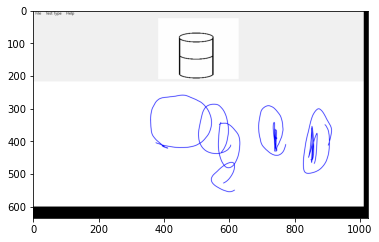

In [294]:
img1 = mpimg.imread('./data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)+".png")
plt.imshow(img1)

In [295]:
(float(df['X'][0]) + 0.2 * float(df[' Pressure'][0]))
(float(df['X'][2])) - (float(df['X'][1]))

4.897563229010984

In [296]:
df[' Time'][0]
def to_number(date_as_str, defualt_value):
    if not date_as_str:
        return defualt_value

    if pd.isna(date_as_str):
        return defualt_value
    
    
    if type(date_as_str) == float:
        return date_as_str
    
    (p1, p2) = date_as_str.split(':')
    p1 = float(p1)
    p2 = float(p2)
    return p1 * 60 + p2

In [297]:
df["Time"] = df[" Time"]
df["Time"][0] = to_number(df["Time"][0], 0)
df["Y"] = df[" Y"]
df["Pressure"] = df[" Pressure"]
df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
df["Pressure"][0] = col_Y_ToNum(df["Pressure"][0], 0)
df["X"][0] = col_X_ToNum(df["X"][0], 0)

flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["Time"][index] = to_number(df["Time"][index], df["Time"][index - 1])
        df["Y"][index] = col_Y_ToNum(df["Y"][index], df["Y"][index - 1])
        df["Pressure"][index] = col_Y_ToNum(df["Pressure"][index], df["Pressure"][index - 1])
        df["X"][index] = col_X_ToNum(df["X"][index], df["X"][index - 1])

df["X"]

C:\Users\moria\AppData\Local\Temp\ipykernel_89604\3679598216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"][0] = to_number(df["Time"][0], 0)
C:\Users\moria\AppData\Local\Temp\ipykernel_89604\3679598216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
C:\Users\moria\AppData\Local\Temp\ipykernel_89604\3679598216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pressure"][0

0      395.702044
1       399.86234
2      404.759903
3      411.237325
4      411.605959
          ...    
874    907.260423
875    905.101282
876    904.206028
877    904.206028
878    904.206028
Name: X, Length: 879, dtype: object

In [298]:
df["Y"]

0      414.660353
1      417.293452
2      419.241945
3      420.505832
4      420.663818
          ...    
874    403.706664
875    410.552720
876    412.869846
877    412.869846
878    412.869846
Name: Y, Length: 879, dtype: float64

In [299]:
df["Time"]

0        6.91302
1       6.944262
2       6.959889
3       6.975503
4        6.99113
         ...    
874    44.453098
875    44.453098
876    44.453098
877    44.453098
878    44.453098
Name: Time, Length: 879, dtype: object

In [300]:
df["Pressure"]

0      0.117174
1      0.123278
2      0.127184
3      0.035874
4      0.053452
         ...   
874    0.463859
875    0.288075
876    0.161852
877    0.161852
878    0.161852
Name: Pressure, Length: 879, dtype: float64

C:\Users\moria\AppData\Local\Temp\ipykernel_89604\2845424429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][0] = 0
C:\Users\moria\AppData\Local\Temp\ipykernel_89604\2845424429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]


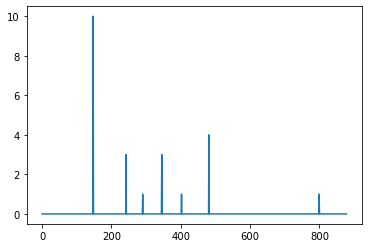

In [301]:
df["TimeDiff"] = np.full(len(df.index), 0)
df["TimeDiff"][0] = 0
flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]
        

plt.plot(df["TimeDiff"])

## Q.1.

Counting lines

* First try using slopes

In [302]:
def calculate_slope(df, up_i):
    if (df['X'][up_i]-df['X'][0]) == 0:
        slp = 0
    else:
        slp = (df['Y'][up_i]-df['Y'][0])/(df['X'][up_i]-df['X'][0])
    return slp

In [303]:
UP_I = 5

def lines_cords(df):
    slp = calculate_slope(df, UP_I)
    lines = []
    prev = 0
    i = 0
    current_slp = slp
    while (i+UP_I)<len(df):
        if (df['Y'][i]!= df['Y'][i+UP_I]) & (df['X'][i]!= df['X'][i+UP_I]):
            current_slp = (df['Y'][i+UP_I]-df['Y'][i])/(df['X'][i+UP_I]-df['X'][i])    
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            slp = current_slp
        else:
            if i-prev>60:
                lines.append({ 'start' : prev, 'end' : i })
                prev = i                    
        slp = current_slp
        i+=1
    
    return lines

In [304]:
lines = lines_cords(df)
print("num of lines: ",len(lines))

num of lines:  13


* Second try using time difference

In [282]:
# def Count_lines_time(df):
#     if (df['X'][1]-df['X'][0]) ==0:
#         slp = 0
#     else:
#         slp = (df['Y'][1]-df['Y'][0])/(df['X'][1]-df['X'][0])
    
#     numOfLines = 0
#     prev = 0
#     i = 0
#     current_slp = slp
#     while (i+1)<len(df):
#         if (df['Y'][i]!= df['Y'][i+1]) & (df['X'][i]!= df['X'][i+1]):
#             current_slp = (df['Y'][i+1]-df['Y'][i])/(df['X'][i+1]-df['X'][i])    
#         if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
#             slp = current_slp
#         else:
#             if i-prev>60:
#                 print("current_slp:   ", current_slp)
#                 print("slp:   ", slp)
#                 numOfLines +=1
#                 prev = i                    
#         slp = current_slp
#         i+=1
    
#     return numOfLines

## Q.2.

Compute the length of each line and the avarage pressure applied by clicking on each line

In [283]:
def avg_pressure(df, start, end):
    sum_pressures = 0
    for j in range(start, end):
        sum_pressures += float(df[" Pressure"][j])
    return sum_pressures/(end - start)


In [305]:
def Lengths_of_lines(df):
    for i in lines:
        start = i['start']
        end = i['end']
        avg_pressure_data = avg_pressure(df, start, end)
        dist = math.dist([df['X'][start] , df['Y'][start]],[df['X'][end], df['Y'][end]])
        print("Length is " , dist , ", Avarage pressure is " , avg_pressure_data )
        print('-------------------')


In [306]:
Lengths_of_lines(df)

Length is  178.32839233189617 , Avarage pressure is  0.49130133654653413
-------------------
Length is  110.10640745871939 , Avarage pressure is  0.556508486335342
-------------------
Length is  71.74008206561493 , Avarage pressure is  0.5422441399458683
-------------------
Length is  67.10691121207074 , Avarage pressure is  0.4451412698928861
-------------------
Length is  124.11304718140168 , Avarage pressure is  0.5041068009421473
-------------------
Length is  129.51508982726307 , Avarage pressure is  0.36566094712155767
-------------------
Length is  122.47431953626513 , Avarage pressure is  0.5198721177265292
-------------------
Length is  50.97812001055912 , Avarage pressure is  0.5757331515921921
-------------------
Length is  50.989950950770634 , Avarage pressure is  0.5657192302531884
-------------------
Length is  31.714313442303595 , Avarage pressure is  0.5542188117632995
-------------------
Length is  86.98533287729654 , Avarage pressure is  0.5804519438352741
-----------

<AxesSubplot:>

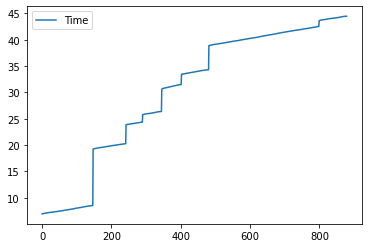

In [307]:
pd.DataFrame({ 'Time':df['Time']}).plot()

<AxesSubplot:>

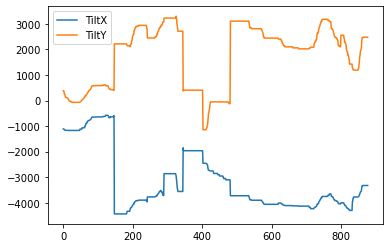

In [308]:
pd.DataFrame({ 'TiltX':df[' TiltX'], 'TiltY':df[' TiltY']}).plot()

<AxesSubplot:>

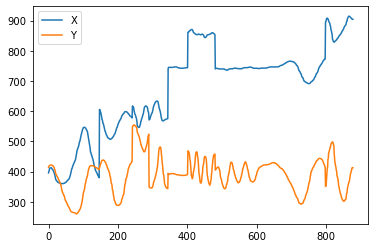

In [309]:
pd.DataFrame({ 'X':df['X'],  'Y':df['Y']}).plot()

## Q.3.

Count how many hand lifts were in the drawing

<AxesSubplot:>

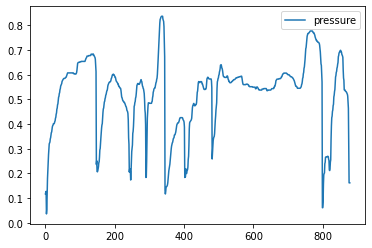

In [310]:
pd.DataFrame({ 'pressure':df['Pressure']}).plot()

In [311]:
MIN_PRESSURE = 0.16
def FindPressure(df):
    lifts = 0
    prev_lift = False
    i = 0
    # current_slp = slp
    while (i+1)<len(df):
        if (df['Pressure'][i] <= MIN_PRESSURE) :
            prev_lift = True
        else:
            if prev_lift:
                lifts+=1
                prev_lift = False
        i+=1
    
    return lifts

In [312]:
print("There is ",FindPressure(df)," hands lifts")

There is  3  hands lifts


## Q.4.

(bonus)
4. לבדוק האם הצורה פתוחה או סגורה )בונוס - רק לגבי צורות מסוימות(

In [313]:
# Not shore its working correctly
def IsOpenOrClose(df):
    closed = False
    i = 10
    start_shape_x = df["X"][0]
    print("shape_x_start:   ", start_shape_x)
    start_shape_y = df["Y"][0]
    print("shape_y_start:   ", start_shape_y)
    while (i) < len(df):
        if ((start_shape_x <= df["X"][i]+20) & (start_shape_x >= df["X"][i]-20)&
                (start_shape_y <= df["Y"][i]+20) & (start_shape_y >= df["Y"][i]-20)) :
            closed = True
        else:
            if closed:
               closed = False
        i+=1
    print("shape_x_end:   ", df["X"][len(df)-1])
    print("shape_y_end:   ", df["Y"][len(df)-1])
    return closed

In [314]:
IsOpenOrClose(df)

shape_x_start:    395.702044115949
shape_y_start:    414.660353389537
shape_x_end:    904.206028409747
shape_y_end:    412.869846402587


False